In [167]:
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('~/Downloads/internet-traffic-data-in-bits-fr(1).csv'
                 , comment='I'
                 , parse_dates=True
                 , index_col=0)
df.columns = ['data']
df.head(5)


<Figure size 432x288 with 0 Axes>

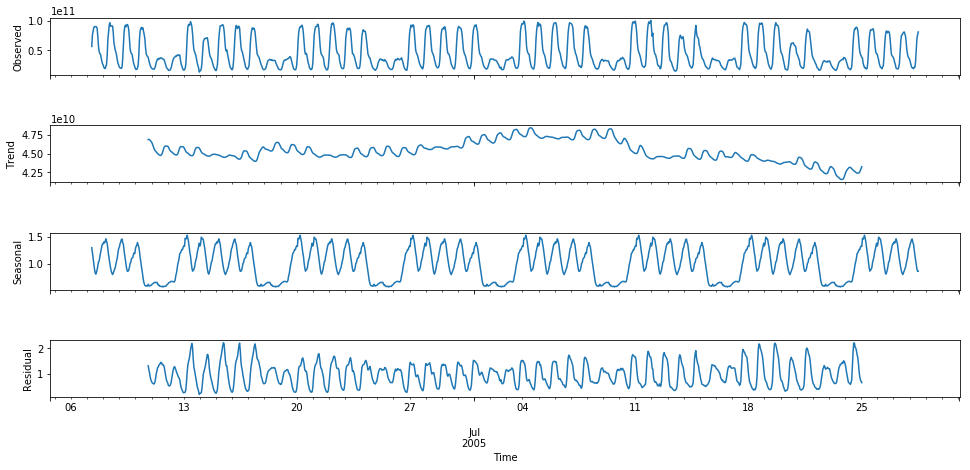

In [173]:
decomposition = seasonal_decompose(df['data'], freq=24*7, model='multiplicative')  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)



In [128]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput) 

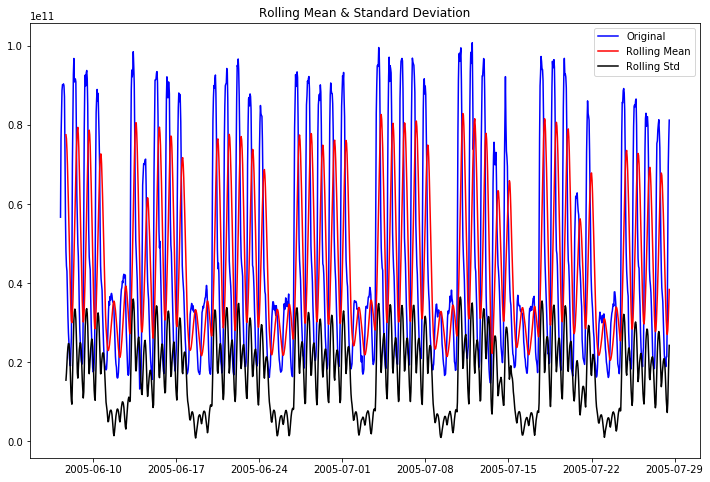

Results of Dickey-Fuller Test:
Test Statistic                -6.021008e+00
p-value                        1.493795e-07
#Lags Used                     2.300000e+01
Number of Observations Used    1.207000e+03
Critical Value (1%)           -3.435779e+00
Critical Value (5%)           -2.863938e+00
Critical Value (10%)          -2.568046e+00
dtype: float64


In [129]:
test_stationarity(df.data)

In [20]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [158]:
df = pd.read_csv('~/Downloads/internet-traffic-data-in-bits-fr(1).csv'
                 , comment='I'
                 , parse_dates=[0])
df.columns = ['ds', 'bits']
df['y2'] = df['bits']/(1.16*(10**10))
df['rolling_std'] = df['y2'].rolling(window=12).std()
df['y'] = df['y2'].apply(np.log) 
df['index'] = df['ds']
df.set_index(['index'], inplace=True)
df = df.asfreq(freq='15T', method='bfill')
df['ds'] = df.index
df.head()

,ds,bits,y2,rolling_std,y
index,,,,,
2005-06-07 07:00:00,2005-06-07 07:00:00,56718587433,4.889533,NaN,1.587097
2005-06-07 07:15:00,2005-06-07 07:15:00,76456162968,6.591049,NaN,1.885712
2005-06-07 07:30:00,2005-06-07 07:30:00,76456162968,6.591049,NaN,1.885712
2005-06-07 07:45:00,2005-06-07 07:45:00,76456162968,6.591049,NaN,1.885712
2005-06-07 08:00:00,2005-06-07 08:00:00,76456162968,6.591049,NaN,1.885712


In [159]:
df['weekend'] = df.index.weekday
df['weekend'] = df['weekend'].apply(lambda x: int(x//5))

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705 entries, 0 to 2704
Data columns (total 6 columns):
ds             2705 non-null datetime64[ns]
bits           2705 non-null int64
y2             2705 non-null float64
rolling_std    2694 non-null float64
y              2705 non-null float64
index          2705 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1)
memory usage: 126.9 KB


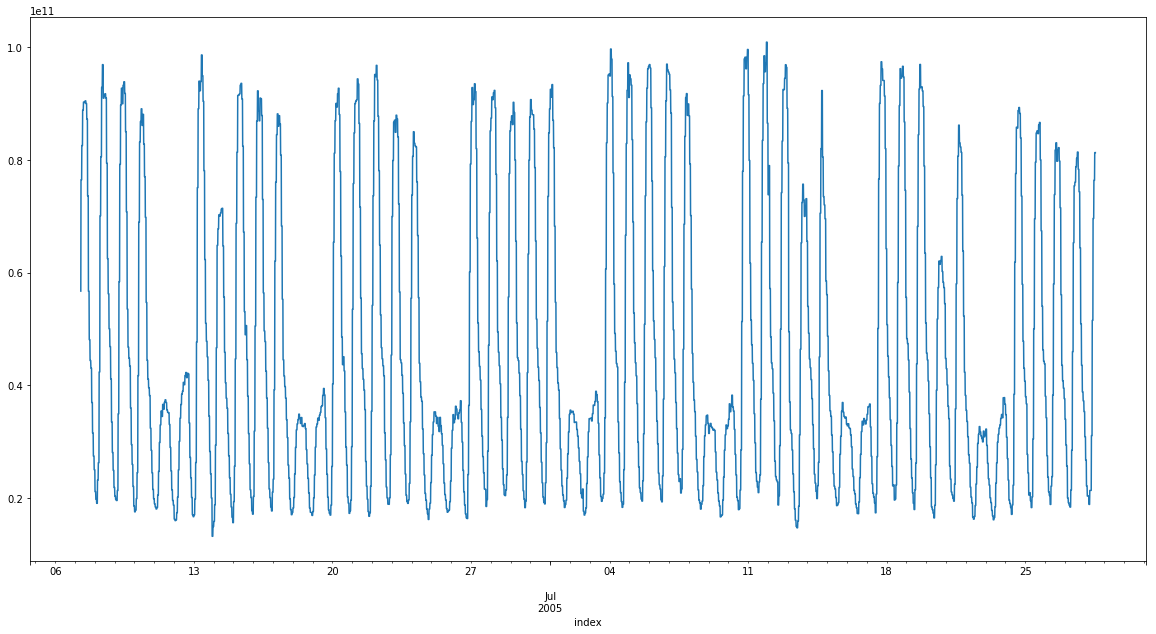

In [160]:
df['bits'].plot(figsize=(20,10))

In [80]:
df.to_csv('test.csv')


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.


INFO:fbprophet.forecaster:Found custom seasonality named "daily", disabling built-in daily seasonality.


/home/chris/miniconda3/envs/playground2/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


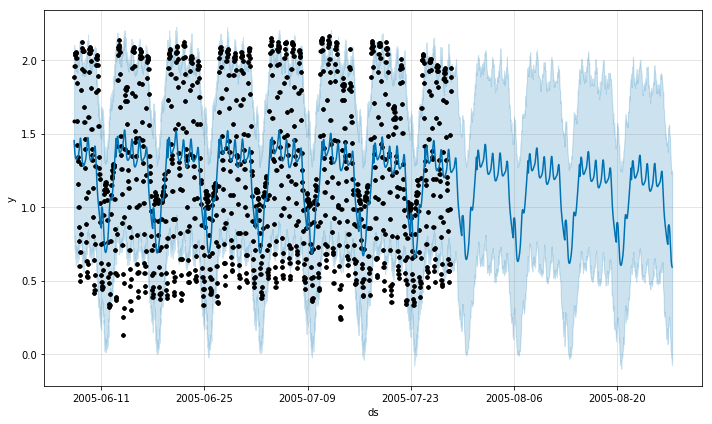

In [166]:
m = Prophet() #holidays=df[df.index.dayofweek >= 5]['ds'].values
m.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=10, mode='multiplicative')
# m.add_seasonality(name='daily2', period=1, fourier_order=10, prior_scale=0.1, mode='additive')
# m.add_seasonality(name='weekly2', period=7, fourier_order=10, prior_scale=0.1, mode='additive')
m.add_seasonality(name='daily', period=1, fourier_order=3, prior_scale=10, mode='additive')
m.add_regressor('weekend', mode='multiplicative')
m.fit(df);
future = m.make_future_dataframe(periods=24*30, freq='H')
future['index'] = future['ds']
future.set_index(['index'], inplace=True)

future['weekend'] = future.index.weekday
future['weekend'] = future['weekend'].apply(lambda x: int(x//5))
forecast = m.predict(future)
m.plot(forecast);


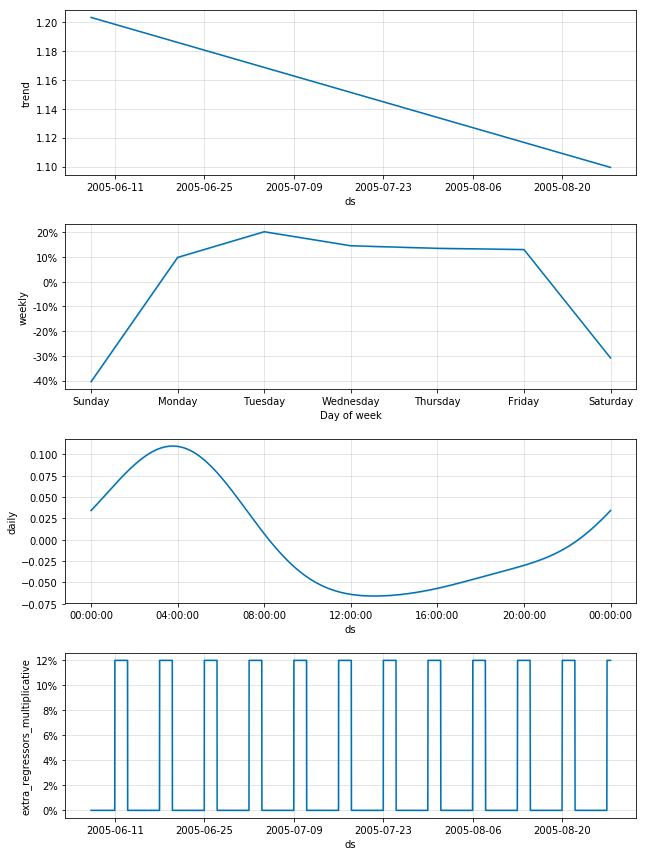

In [165]:
m.plot_components(forecast);

In [109]:
help(Prophet)

Help on class Prophet in module fbprophet.forecaster:

class Prophet(builtins.object)
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly from
 |      the first `changepoint_range` proportion of the history.
 |  changepoint_range: Proportion of history in which trend changepoints will
 |      be estimated. Defaults to 0.8 for the first 80%. Not used if
 |      `changepoints` is specified.
 |  Not used if input `changepoints` is supplied.
 |  yearly_seasonality: Fit yearly seasonality.
 |      Can be 'auto', True, Fals